In [2]:
# Importing GemPy
import gempy as gp

import pandas as pd

Traceback (most recent call last):
  File "C:\Users\AHMED\anaconda3\lib\site-packages\osgeo\__init__.py", line 29, in swig_import_helper
    return importlib.import_module(mname)
  File "C:\Users\AHMED\anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 666, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 565, in module_from_spec
  File "<frozen importlib._bootstrap_external>", line 1173, in create_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
ImportError: DLL load failed while importing _gdal: The specified module could not be found.

On Windows, with Python >= 3.8, DLLs are no longer imported from the 

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\AHMED\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"
geo_data = gp.create_data('fold', extent=[0, 1000, 0, 1000, 0, 1000], resolution=[50, 50, 50],
                          path_o=path_to_data + "model2_orientations.csv",
                          path_i=path_to_data + "model2_surface_points.csv")

Active grids: ['regular']


In [4]:
geo_data.get_data().head()

X    Y    Z    smooth surface  G_x  G_y  G_z
surface_points 0    0  100  200  0.000002   rock1  NaN  NaN  NaN
               1    0  500  200  0.000002   rock1  NaN  NaN  NaN
               2    0  900  200  0.000002   rock1  NaN  NaN  NaN
               3  400  100  600  0.000002   rock1  NaN  NaN  NaN
               4  400  500  600  0.000002   rock1  NaN  NaN  NaN

In [5]:
gp.map_stack_to_surfaces(geo_data, {"Strat_Series": ('rock2', 'rock1'), "Basement_Series": ('basement')})

,surface,series,order_surfaces,color,id
0,rock1,Strat_Series,1,#015482,1
1,rock2,Strat_Series,2,#9f0052,2
2,basement,Basement_Series,1,#ffbe00,3


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


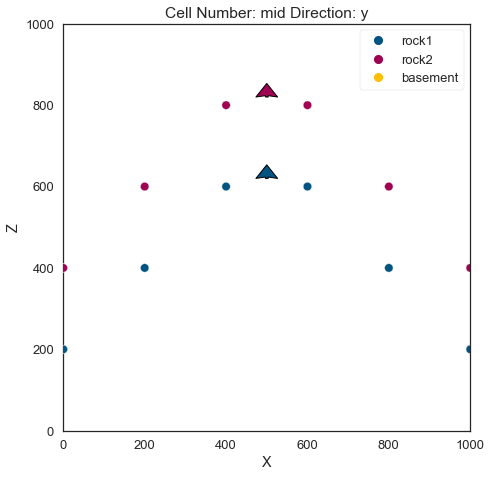

In [6]:
gp.plot_2d(geo_data,direction=['y'])

In [7]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_compile')


Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range             1732.050808
$C_o$            71428.571429
drift equations        [3, 3]


In [8]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
1,500,500,620,1.000000e-12,1.000000e-12,1.0,0.01,rock1
0,500,500,820,1.000000e-12,1.000000e-12,1.0,0.01,rock2


In [9]:
sol = gp.compute_model(geo_data)

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


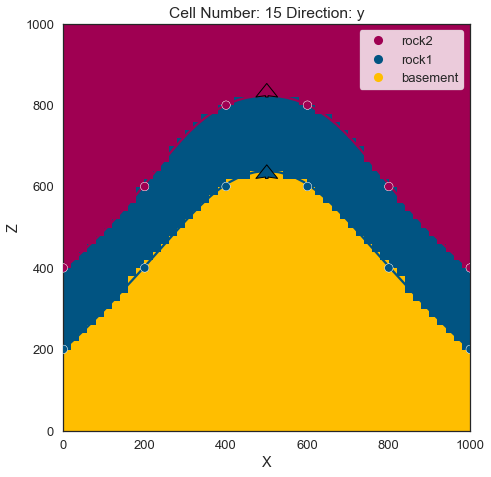

In [10]:
gp.plot_2d(geo_data, cell_number=15,
           direction='y', show_data=True)

In [11]:
gp.plot_3d(geo_data)

C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
